# Law of Large Numbers Visualization

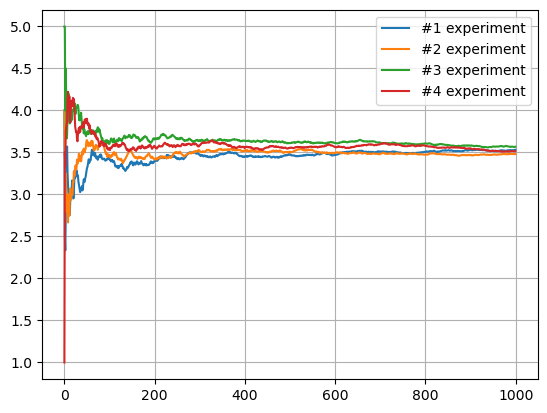

In [16]:
import numpy as np
import matplotlib.pyplot as plt

calc_times = 1000
sample_array = np.array([1, 2, 3, 4, 5, 6])
num_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p/ num_cnt, label=f"#{i+1} experiment")
    plt.legend()
    plt.grid(True)

# Central Limit Theorem

In [17]:
from scipy.stats import norm, t

def simulate_die_clt(n_samples: int = 10_000, sample_size: int = 30):
    """
    Demonstrate the Central Limit Theorem with a fair six-sided die.
    Parameters
    ----------
    n_samples : int number of samples
    sample_size : int size of each sample
    Returns
    -------
    sample_means : np.ndarray, shape (n_samples,)
    Array containing the sample mean from each replication.
    """
    #Draw all rolls in one vectoized call: shape = (n_samples, sample_size)
    samples = np.random.randint(1, 7, size=(n_samples, sample_size))
    sample_means = samples.mean(axis=1)

    mu, sigma2 = 3.5, 35 / 12
    sigma = np.sqrt(sigma2)
    x = np.linspace(sample_means.min(), sample_means.max(), 300)

    plt.figure()
    plt.hist(sample_means, bins=39, density=True, alpha=0.7, label='Simulated means')
    plt.plot(x, norm.pdf(x, mu, sigma / np.sqrt(sample_size)), linewidth=2, label=r'${N}(\mu, \sigma/\sqrt{n})$')
    plt.xlabel(f'Samplemean (n = {sample_size})')
    plt.ylabel('Density')
    plt.title(f'CLT: {n_samples:,} means of {sample_size} die rolls')
    plt.legend()

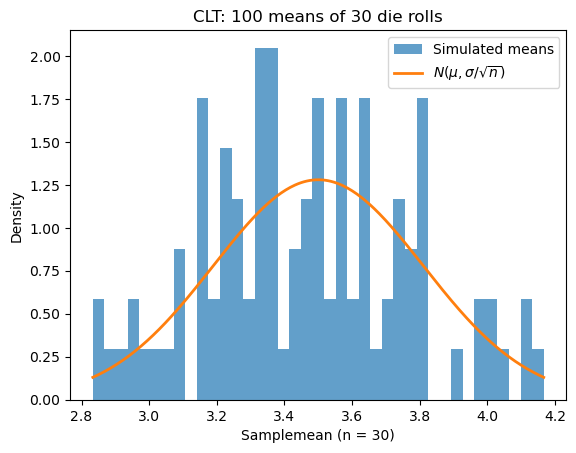

In [18]:
simulate_die_clt(100)

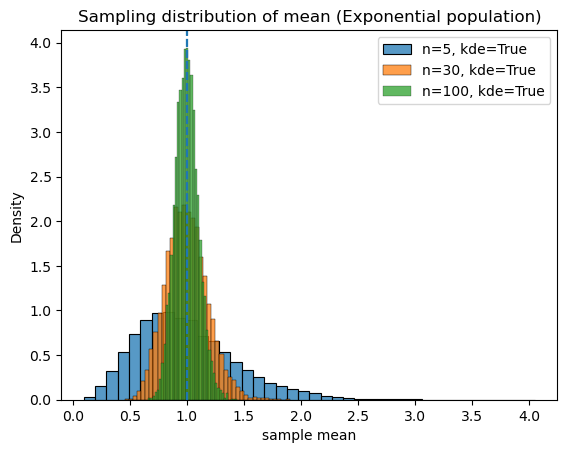

In [19]:
# Simulate from an exponential distribution (skewed) and show CLT effect import seaborn as sns; sns.set()
import seaborn as sns

np.random.seed(1)
# rate parameter
lmbda = 1
for n in [5, 30, 100]:
    means = np.random.exponential(scale=1/lmbda, size=(10000, n)).mean(axis=1)
    sns.histplot(means, stat='density', bins=40, label=f'n={n}, kde=True')
    plt.axvline(1, ls='--')
plt.title('Sampling distribution of mean (Exponential population)');
plt.xlabel('sample mean'); plt.legend(); plt.show()

In [25]:
np.random.seed(0)
def mean_ci(data, alpha=0.05):
    n = len(data)
    x_bar = np.mean(data)
    s = np.std(data, ddof=1)
    t_crit = t.ppf(1-alpha/2, df=n-1)
    half_width = t_crit * s / np.sqrt(n)
    return x_bar - half_width, x_bar + half_width
data = np.random.randint(1, 7, 30)
x_bar = np.mean(data)
s = np.std(data, ddof=1)
ci = mean_ci(data)
print(f"sample mean: {x_bar}\n sample variance: {s}\n")
print(ci)

sample mean: 3.3333333333333335
 sample variance: 1.8257418583505536

(2.651590119289099, 4.015076547377568)
